In [43]:
from rdkit import Chem
from rdkit.Chem import Draw
import os
import glob
import numpy as np
import pandas as pd
import PIL
from random import sample
import csv
import pubchempy as pcp
import matplotlib.pyplot as plt
import bokeh
from itertools import chain
%matplotlib inline

# read pubchem CIDs from files

In [67]:
os.chdir("/home/jgmeyer2/drugclass/Networks/data/fromPubChem")

In [68]:
tables_list=glob.glob("*txt")
print(tables_list)
CID_dict = {}
cidslist = []
for table in tables_list:
    tableID = table.replace('.txt','')
    tableID = tableID.replace('../data/','')
    CID_dict[tableID] = []
    with open(table) as inf:
        for aline in inf.readlines():
            if aline.startswith('CID')==True:
                #cid = aline.replace('\n')
                CID_dict[tableID].append(aline.replace('\n','').replace('CID: ',''))
                

print(len(CID_dict[tableID]))
CID_dict.keys()
print(CID_dict[tableID][0])

['gastrointestinal.txt', 'dermatologic.txt', 'urological.txt', 'cns.txt', 'antiinfective.txt', 'antineoplastic.txt', 'reproductivecontrol.txt', 'lipidregulating.txt', 'hematologic.txt', 'respiratorysystem.txt', 'cardio.txt', 'antiinflammatory.txt']
662
134715169


# get SMILES for CIDs

### keep things with smiles length <400

In [69]:
smiles_dict = {}

for key in CID_dict.keys():
    smiles_dict[key] = []
    prop_dict = pcp.get_properties('IsomericSMILES', CID_dict[key])
    for i in range(0, len(prop_dict)):
        if len(prop_dict[i]['IsomericSMILES'])<400:  #### only those under 200 char
            smiles_dict[key].append(prop_dict[i]['IsomericSMILES'])

                
print(prop_dict[i]["IsomericSMILES"])
print(len(smiles_dict[key]))


C1=CC(=C(C=C1C2C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O
656


## do any overlap?


### make master list of all smiles that overlap among the sets

In [70]:
rm = []
for key1 in smiles_dict.keys():
    print(key1+ '__________MAIN_len='+str(len(set(smiles_dict[key1]))))
    for key2 in smiles_dict.keys(): ### loop through the keys and check for overlap
        if key1 != key2: ### first key cannot equal second key
            rm.append(list(set(smiles_dict[key1]) & set(smiles_dict[key2])))
            print(str(key2)+'_'+str(len(list(set(smiles_dict[key1]) & set(smiles_dict[key2])))))

gastrointestinal__________MAIN_len=616
dermatologic_9
urological_0
cns_151
antiinfective_69
antineoplastic_27
reproductivecontrol_2
lipidregulating_19
hematologic_5
respiratorysystem_4
cardio_22
antiinflammatory_46
dermatologic__________MAIN_len=253
gastrointestinal_9
urological_0
cns_5
antiinfective_45
antineoplastic_40
reproductivecontrol_6
lipidregulating_0
hematologic_0
respiratorysystem_5
cardio_0
antiinflammatory_30
urological__________MAIN_len=73
gastrointestinal_0
dermatologic_0
cns_0
antiinfective_7
antineoplastic_0
reproductivecontrol_0
lipidregulating_0
hematologic_1
respiratorysystem_0
cardio_17
antiinflammatory_0
cns__________MAIN_len=2023
gastrointestinal_151
dermatologic_5
urological_0
antiinfective_34
antineoplastic_43
reproductivecontrol_12
lipidregulating_11
hematologic_13
respiratorysystem_117
cardio_208
antiinflammatory_30
antiinfective__________MAIN_len=3364
gastrointestinal_69
dermatologic_45
urological_7
cns_34
antineoplastic_362
reproductivecontrol_5
lipidregula

In [71]:
len(rm)
rm = list(chain.from_iterable(rm))
#len(rm)
#rm = list(chain.from_iterable(rm))
print(len(rm))
print(len(set(rm)))
rm

4254
1647


['CN1CCC(=C2C3=CC=CC=C3C=CC4=CC=CC=C42)CC1.Cl',
 'CC1=NC=CN1CC2CCC3C(C2=O)C4=CC=CC=C4N3.Cl',
 'CC1=NC=CN1CC2CCC3=C(C2=O)C4=CC=CC=C4N3C.Cl',
 'CC1=NC=CN1CC2CCC3=C(C2=O)C4=CC=CC=C4N3C.O.O.Cl',
 'CC1=NC=CN1CC2CCC3=C(C2=O)C4=CC=CC=C4N3C',
 'CN1CCC(=C2C3=CC=CC=C3C=CC4=CC=CC=C42)CC1.CN1CCC(=C2C3=CC=CC=C3C=CC4=CC=CC=C42)CC1.O.O.O.Cl.Cl',
 'CN(C)CCN(CC1=CC=CC=C1)C2=CC=CC=C2',
 'CN1CCC(=C2C3=CC=CC=C3C=CC4=CC=CC=C42)CC1',
 'C1(C(=O)NC(=N1)O[Al])NC(=O)N.O.O',
 'CN1CCN(CC1)CCCN2C3=C(SC4=CC=CC=C24)C=CC(=C3)Cl.C(=C/C(=O)O)\\C(=O)O.C(=C/C(=O)O)\\C(=O)O',
 'C1=CC=C(C(=C1)C2=NC(C(=O)NC3=C2C=C(C=C3)Cl)O)Cl',
 'CN1CCC2=CC=CC3=C2[C@H]1CC4=C3C(=C(C=C4)O)O.Cl',
 '[H+].[H+].[H+].[H+].CN1CCN(CC1)CCCN2C3=C(SC4=CC=CC=C24)C=CC(=C3)Cl.C(=C\\C(=O)[O-])\\C(=O)[O-].C(=C\\C(=O)[O-])\\C(=O)[O-]',
 'CN1CCN(CC1)CCCN2C3=CC=CC=C3SC4=C2C=C(C=C4)C(F)(F)F',
 'C1=C(NC=N1)C[C@@](CF)(C(=O)[O-])[NH3+]',
 'CN1C2CCC1CC(C2)OC(=O)C3=CNC4=CC=CC=C43.Cl',
 'CC(C1=CC=CC=C1)(C2=CC=CC=N2)OCCN(C)C',
 'CN(C)CCOC(C1=CC=CC=C1)C2=CC=CC=C2.C(C(

### Remove those and check there is no longer overlap

In [72]:
nsmilesd = {}
for key in smiles_dict.keys():
    nsmilesd[key] = list(set(smiles_dict[key])-set(rm))
    print(key+ '__________NEW_len='+str(len(nsmilesd[key])))
    print(key+ '__________OLD_len='+str(len(set(smiles_dict[key]))))
    

gastrointestinal__________NEW_len=321
gastrointestinal__________OLD_len=616
dermatologic__________NEW_len=134
dermatologic__________OLD_len=253
urological__________NEW_len=49
urological__________OLD_len=73
cns__________NEW_len=1501
cns__________OLD_len=2023
antiinfective__________NEW_len=2790
antiinfective__________OLD_len=3364
antineoplastic__________NEW_len=1326
antineoplastic__________OLD_len=1859
reproductivecontrol__________NEW_len=165
reproductivecontrol__________OLD_len=264
lipidregulating__________NEW_len=176
lipidregulating__________OLD_len=225
hematologic__________NEW_len=315
hematologic__________OLD_len=535
respiratorysystem__________NEW_len=144
respiratorysystem__________OLD_len=396
cardio__________NEW_len=1039
cardio__________OLD_len=1635
antiinflammatory__________NEW_len=412
antiinflammatory__________OLD_len=652


### check they overlap is gone

In [73]:
for key1 in nsmilesd.keys():
    rm2 = []
    print(key1+ '__________MAIN_len='+str(len(nsmilesd[key1])))
    for key2 in nsmilesd.keys(): ### loop through the keys and check for overlap
        if key1 != key2: ### first key cannot equal second key
            rm2.append(list(set(nsmilesd[key1]) & set(nsmilesd[key2])))
            print(str(key2)+'_'+str(len(list(set(nsmilesd[key1]) & set(nsmilesd[key2])))))

gastrointestinal__________MAIN_len=321
dermatologic_0
urological_0
cns_0
antiinfective_0
antineoplastic_0
reproductivecontrol_0
lipidregulating_0
hematologic_0
respiratorysystem_0
cardio_0
antiinflammatory_0
dermatologic__________MAIN_len=134
gastrointestinal_0
urological_0
cns_0
antiinfective_0
antineoplastic_0
reproductivecontrol_0
lipidregulating_0
hematologic_0
respiratorysystem_0
cardio_0
antiinflammatory_0
urological__________MAIN_len=49
gastrointestinal_0
dermatologic_0
cns_0
antiinfective_0
antineoplastic_0
reproductivecontrol_0
lipidregulating_0
hematologic_0
respiratorysystem_0
cardio_0
antiinflammatory_0
cns__________MAIN_len=1501
gastrointestinal_0
dermatologic_0
urological_0
antiinfective_0
antineoplastic_0
reproductivecontrol_0
lipidregulating_0
hematologic_0
respiratorysystem_0
cardio_0
antiinflammatory_0
antiinfective__________MAIN_len=2790
gastrointestinal_0
dermatologic_0
urological_0
cns_0
antineoplastic_0
reproductivecontrol_0
lipidregulating_0
hematologic_0
respira

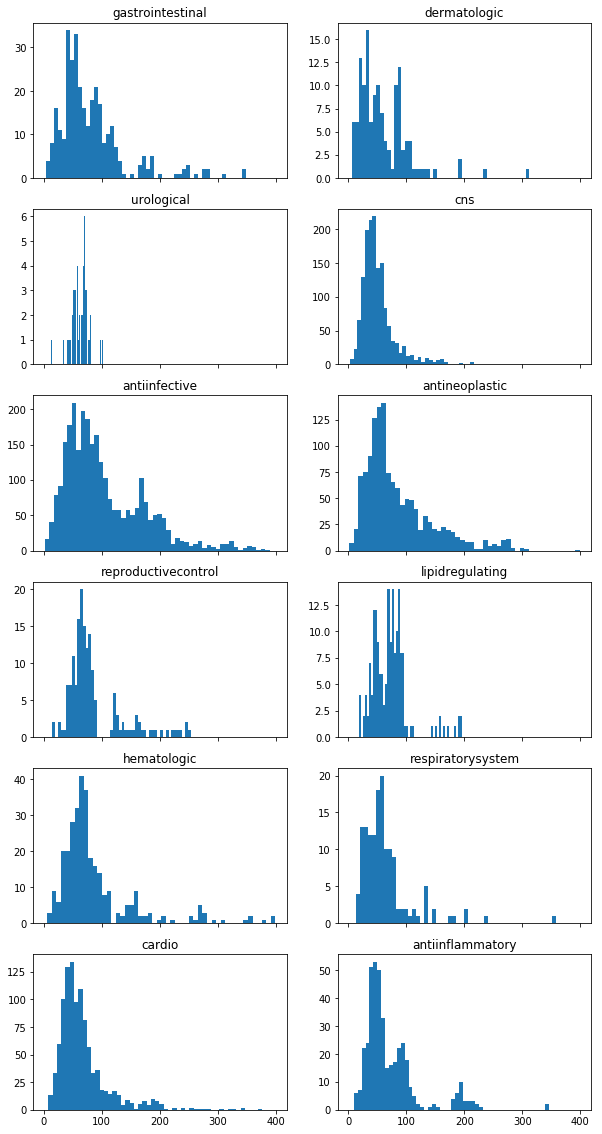

In [74]:
smiles_dict = nsmilesd
fig, axs = plt.subplots(ncols=2, figsize=(10, 20),nrows=6, sharex ='col')
k = 0
keys = list(smiles_dict.keys())

for i in range(6):
    for j in range(2):
        smileslens = [len(i) for i in smiles_dict[keys[k]]]
        axs[i, j].hist(smileslens,bins=50)
        axs[i,j].set_title(str(keys[k]).format(i+1))
        k +=1

# write SMILES to files

In [76]:
os.chdir('/home/jgmeyer2/drugclass/Networks/data_no_overlap/SMILES')

In [77]:
smiles_dict.keys()

dict_keys(['gastrointestinal', 'dermatologic', 'urological', 'cns', 'antiinfective', 'antineoplastic', 'reproductivecontrol', 'lipidregulating', 'hematologic', 'respiratorysystem', 'cardio', 'antiinflammatory'])

In [78]:
for key in smiles_dict.keys():
    with open(key+"_smiles_rmOL.csv","w") as outfile:
        for smiles in smiles_dict[key]:
            outfile.write(smiles + '\n')

# make PNGs of SMILES

In [79]:
#x_mol = Chem.MolFromSmiles(str(p[0]['IsomericSMILES']))
PATH='/home/jgmeyer2/drugclass/Networks/data_no_overlap/'
for key in smiles_dict.keys():
    n = 0
    os.makedirs(PATH+str(key).strip('.'), exist_ok=True)
    for smiles in smiles_dict[key]:
        x_mol = Chem.MolFromSmiles(str(smiles))
        Draw.MolToFile(x_mol, fileName=PATH+str(key)+'/'+str(n)+'.png', size=(500, 500), kekulize=True, wedgeBonds=True, imageType="png")
        n +=1

### cannot use 'canonical smiles' to flatten, they have very different class membership, instead use wedge=F

In [117]:
#x_mol = Chem.MolFromSmiles(str(p[0]['IsomericSMILES']))
PATH='../data_no_overlap'
for key in smiles_dict.keys():
    n = 0
    os.makedirs(PATH+str(key).strip('.')+'_flat', exist_ok=True)
    for smiles in smiles_dict[key]:
        x_mol = Chem.MolFromSmiles(str(smiles))
        Draw.MolToFile(x_mol, fileName='../data_no_overlap'+str(key).strip('.')+'_flat/'+str(n)+'.png', size=(500, 500), kekulize=True, wedgeBonds=False, imageType="png")
        n +=1

## check using 'canonical smiles' to flatten images
they have many fewer examples per class

In [105]:
smiles_dict = {}

for key in CID_dict.keys():
    smiles_dict[key] = []
    prop_dict = pcp.get_properties('CanonicalSMILES', CID_dict[key])
    for i in range(0, len(prop_dict)):
        if len(prop_dict[i]['CanonicalSMILES'])<400:  #### only those under 200 char
            smiles_dict[key].append(prop_dict[i]['CanonicalSMILES'])

            

### Make grey pngs

# make .csv with 2 columns, id and class

In [56]:
#pic.names
os.chdir('/home/jgmeyer2/drugclass/Networks/data_no_overlap/pics')
for file in glob.glob('*' ,recursive=True):
    print(file)

5labels_rmOL.csv
5cls_val_ids7.csv
12cls_val_ids4.csv
12cls_val_ids1.csv
5cls_val_ids2.csv
reproductivecontrol
cardio
12cls_val_ids0.csv
3cls_val_ids9.csv
5cls_val_ids0.csv
3cls_val_ids5.csv
lipidregulating
12cls_val_ids3.csv
5cls_val_ids4.csv
respiratorysystem
3cls_val_ids7.csv
12labels_rmOL.csv
5cls_val_ids6.csv
urological
3labels_rmOL.csv
3cls_val_ids6.csv
cns
3cls_val_ids2.csv
3cls_val_ids0.csv
gastrointestinal
5cls_val_ids8.csv
antiinfective
hematologic
dermatologic
5cls_val_ids3.csv
antineoplastic
12cls_val_ids7.csv
5cls_val_ids9.csv
3cls_val_ids4.csv
12cls_val_ids5.csv
12cls_val_ids8.csv
5cls_val_ids1.csv
3cls_val_ids3.csv
3cls_val_ids8.csv
12cls_val_ids6.csv
labels.csv
antiinflammatory
12cls_val_ids2.csv
3cls_val_ids1.csv
5cls_val_ids5.csv
12cls_val_ids9.csv


In [57]:
files  = !find . -name "*png"
files

['./reproductivecontrol/139.png',
 './reproductivecontrol/4.png',
 './reproductivecontrol/135.png',
 './reproductivecontrol/49.png',
 './reproductivecontrol/108.png',
 './reproductivecontrol/23.png',
 './reproductivecontrol/106.png',
 './reproductivecontrol/128.png',
 './reproductivecontrol/131.png',
 './reproductivecontrol/111.png',
 './reproductivecontrol/153.png',
 './reproductivecontrol/52.png',
 './reproductivecontrol/7.png',
 './reproductivecontrol/45.png',
 './reproductivecontrol/19.png',
 './reproductivecontrol/83.png',
 './reproductivecontrol/151.png',
 './reproductivecontrol/115.png',
 './reproductivecontrol/44.png',
 './reproductivecontrol/43.png',
 './reproductivecontrol/138.png',
 './reproductivecontrol/149.png',
 './reproductivecontrol/57.png',
 './reproductivecontrol/69.png',
 './reproductivecontrol/93.png',
 './reproductivecontrol/73.png',
 './reproductivecontrol/126.png',
 './reproductivecontrol/48.png',
 './reproductivecontrol/14.png',
 './reproductivecontrol/26.png',

In [59]:
sorted(files, key=lambda i: int(os.path.splitext(os.path.basename(i))[0]))

['./reproductivecontrol/0.png',
 './cardio/0.png',
 './lipidregulating/0.png',
 './respiratorysystem/0.png',
 './urological/0.png',
 './cns/0.png',
 './gastrointestinal/0.png',
 './antiinfective/0.png',
 './hematologic/0.png',
 './dermatologic/0.png',
 './antineoplastic/0.png',
 './antiinflammatory/0.png',
 './reproductivecontrol/1.png',
 './cardio/1.png',
 './lipidregulating/1.png',
 './respiratorysystem/1.png',
 './urological/1.png',
 './cns/1.png',
 './gastrointestinal/1.png',
 './antiinfective/1.png',
 './hematologic/1.png',
 './dermatologic/1.png',
 './antineoplastic/1.png',
 './antiinflammatory/1.png',
 './reproductivecontrol/2.png',
 './cardio/2.png',
 './lipidregulating/2.png',
 './respiratorysystem/2.png',
 './urological/2.png',
 './cns/2.png',
 './gastrointestinal/2.png',
 './antiinfective/2.png',
 './hematologic/2.png',
 './dermatologic/2.png',
 './antineoplastic/2.png',
 './antiinflammatory/2.png',
 './reproductivecontrol/3.png',
 './cardio/3.png',
 './lipidregulating/3.png

In [141]:
files = !find . -name "*png"

with open("labels.csv", "w") as outfile:
    outfile.write("path,file\n")
    for file in files:    
        drug_class = file.split("/")[1]
        path_to_file = file.split('./')[1]
        print(path_to_file)
        path_to_file = path_to_file.split(".png")[0]
        print(drug_class,path_to_file)
        outfile.write(path_to_file + "," + drug_class + "\n")

reproductivecontrol/139.png
reproductivecontrol reproductivecontrol/139
reproductivecontrol/4.png
reproductivecontrol reproductivecontrol/4
reproductivecontrol/135.png
reproductivecontrol reproductivecontrol/135
reproductivecontrol/49.png
reproductivecontrol reproductivecontrol/49
reproductivecontrol/108.png
reproductivecontrol reproductivecontrol/108
reproductivecontrol/23.png
reproductivecontrol reproductivecontrol/23
reproductivecontrol/106.png
reproductivecontrol reproductivecontrol/106
reproductivecontrol/128.png
reproductivecontrol reproductivecontrol/128
reproductivecontrol/131.png
reproductivecontrol reproductivecontrol/131
reproductivecontrol/111.png
reproductivecontrol reproductivecontrol/111
reproductivecontrol/153.png
reproductivecontrol reproductivecontrol/153
reproductivecontrol/52.png
reproductivecontrol reproductivecontrol/52
reproductivecontrol/7.png
reproductivecontrol reproductivecontrol/7
reproductivecontrol/45.png
reproductivecontrol reproductivecontrol/45
reproduc

cardio cardio/418
cardio/951.png
cardio cardio/951
cardio/107.png
cardio cardio/107
cardio/13.png
cardio cardio/13
cardio/207.png
cardio cardio/207
lipidregulating/139.png
lipidregulating lipidregulating/139
lipidregulating/4.png
lipidregulating lipidregulating/4
lipidregulating/135.png
lipidregulating lipidregulating/135
lipidregulating/49.png
lipidregulating lipidregulating/49
lipidregulating/108.png
lipidregulating lipidregulating/108
lipidregulating/23.png
lipidregulating lipidregulating/23
lipidregulating/106.png
lipidregulating lipidregulating/106
lipidregulating/128.png
lipidregulating lipidregulating/128
lipidregulating/131.png
lipidregulating lipidregulating/131
lipidregulating/111.png
lipidregulating lipidregulating/111
lipidregulating/153.png
lipidregulating lipidregulating/153
lipidregulating/52.png
lipidregulating lipidregulating/52
lipidregulating/7.png
lipidregulating lipidregulating/7
lipidregulating/45.png
lipidregulating lipidregulating/45
lipidregulating/19.png
lipid

cns/339.png
cns cns/339
cns/360.png
cns cns/360
cns/326.png
cns cns/326
cns/838.png
cns cns/838
cns/552.png
cns cns/552
cns/1446.png
cns cns/1446
cns/405.png
cns cns/405
cns/554.png
cns cns/554
cns/579.png
cns cns/579
cns/292.png
cns cns/292
cns/697.png
cns cns/697
cns/895.png
cns cns/895
cns/880.png
cns cns/880
cns/1250.png
cns cns/1250
cns/1455.png
cns cns/1455
cns/711.png
cns cns/711
cns/1376.png
cns cns/1376
cns/158.png
cns cns/158
cns/459.png
cns cns/459
cns/414.png
cns cns/414
cns/1040.png
cns cns/1040
cns/849.png
cns cns/849
cns/276.png
cns cns/276
cns/96.png
cns cns/96
cns/5.png
cns cns/5
cns/99.png
cns cns/99
cns/537.png
cns cns/537
cns/313.png
cns cns/313
cns/297.png
cns cns/297
cns/1354.png
cns cns/1354
cns/517.png
cns cns/517
cns/394.png
cns cns/394
cns/894.png
cns cns/894
cns/1480.png
cns cns/1480
cns/524.png
cns cns/524
cns/1372.png
cns cns/1372
cns/1285.png
cns cns/1285
cns/548.png
cns cns/548
cns/1434.png
cns cns/1434
cns/797.png
cns cns/797
cns/18.png
cns cns/18
cns/56

antiinfective antiinfective/2481
antiinfective/1717.png
antiinfective antiinfective/1717
antiinfective/1599.png
antiinfective antiinfective/1599
antiinfective/1152.png
antiinfective antiinfective/1152
antiinfective/52.png
antiinfective antiinfective/52
antiinfective/188.png
antiinfective antiinfective/188
antiinfective/1408.png
antiinfective antiinfective/1408
antiinfective/654.png
antiinfective antiinfective/654
antiinfective/2369.png
antiinfective antiinfective/2369
antiinfective/1845.png
antiinfective antiinfective/1845
antiinfective/1301.png
antiinfective antiinfective/1301
antiinfective/1451.png
antiinfective antiinfective/1451
antiinfective/320.png
antiinfective antiinfective/320
antiinfective/504.png
antiinfective antiinfective/504
antiinfective/447.png
antiinfective antiinfective/447
antiinfective/1766.png
antiinfective antiinfective/1766
antiinfective/2199.png
antiinfective antiinfective/2199
antiinfective/1509.png
antiinfective antiinfective/1509
antiinfective/251.png
antiinf

antiinfective/344.png
antiinfective antiinfective/344
antiinfective/691.png
antiinfective antiinfective/691
antiinfective/2180.png
antiinfective antiinfective/2180
antiinfective/1221.png
antiinfective antiinfective/1221
antiinfective/994.png
antiinfective antiinfective/994
antiinfective/2507.png
antiinfective antiinfective/2507
antiinfective/2559.png
antiinfective antiinfective/2559
antiinfective/668.png
antiinfective antiinfective/668
antiinfective/94.png
antiinfective antiinfective/94
antiinfective/1506.png
antiinfective antiinfective/1506
antiinfective/2157.png
antiinfective antiinfective/2157
antiinfective/1483.png
antiinfective antiinfective/1483
antiinfective/962.png
antiinfective antiinfective/962
antiinfective/1257.png
antiinfective antiinfective/1257
antiinfective/53.png
antiinfective antiinfective/53
antiinfective/1696.png
antiinfective antiinfective/1696
antiinfective/1233.png
antiinfective antiinfective/1233
antiinfective/1015.png
antiinfective antiinfective/1015
antiinfect

antiinfective antiinfective/2233
antiinfective/1624.png
antiinfective antiinfective/1624
antiinfective/98.png
antiinfective antiinfective/98
antiinfective/2050.png
antiinfective antiinfective/2050
antiinfective/2720.png
antiinfective antiinfective/2720
antiinfective/527.png
antiinfective antiinfective/527
antiinfective/2482.png
antiinfective antiinfective/2482
antiinfective/85.png
antiinfective antiinfective/85
antiinfective/1749.png
antiinfective antiinfective/1749
antiinfective/433.png
antiinfective antiinfective/433
antiinfective/1576.png
antiinfective antiinfective/1576
antiinfective/2222.png
antiinfective antiinfective/2222
antiinfective/2493.png
antiinfective antiinfective/2493
antiinfective/1991.png
antiinfective antiinfective/1991
antiinfective/1778.png
antiinfective antiinfective/1778
antiinfective/2040.png
antiinfective antiinfective/2040
antiinfective/1079.png
antiinfective antiinfective/1079
antiinfective/2158.png
antiinfective antiinfective/2158
antiinfective/270.png
antii

antineoplastic antineoplastic/710
antineoplastic/311.png
antineoplastic antineoplastic/311
antineoplastic/148.png
antineoplastic antineoplastic/148
antineoplastic/264.png
antineoplastic antineoplastic/264
antineoplastic/497.png
antineoplastic antineoplastic/497
antineoplastic/293.png
antineoplastic antineoplastic/293
antineoplastic/309.png
antineoplastic antineoplastic/309
antineoplastic/701.png
antineoplastic antineoplastic/701
antineoplastic/708.png
antineoplastic antineoplastic/708
antineoplastic/1222.png
antineoplastic antineoplastic/1222
antineoplastic/978.png
antineoplastic antineoplastic/978
antineoplastic/1031.png
antineoplastic antineoplastic/1031
antineoplastic/1280.png
antineoplastic antineoplastic/1280
antineoplastic/721.png
antineoplastic antineoplastic/721
antineoplastic/150.png
antineoplastic antineoplastic/150
antineoplastic/404.png
antineoplastic antineoplastic/404
antineoplastic/355.png
antineoplastic antineoplastic/355
antineoplastic/722.png
antineoplastic antineopla

## The split into 3, 5 and 12 class in excel, and sort by picture number and class so the smiles match the pictures

### make .csv files with indexes of validation

In [85]:
from itertools import chain
import pandas as pd
import os
import random

In [115]:
x=0
while x < 10:
    random.seed(449321)
    print(random.sample(range(10), 1))
    x+=1

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


In [122]:
random.seed(214892345)

In [127]:

def get_val_cv_byclass(label_csv):
    label_df = pd.read_csv(label_csv)
    val_idxs = []
    for x in label_df['class'].unique(): 
        start= label_df.index[label_df['class'] == x].tolist()[0]
        end = start+len(label_df.index[label_df['class'] == x].tolist())-1
        n_sample = int(round((end-start)*0.2,0))
        val_idxs.append(random.sample(range(start,end),n_sample))
    val_idxs = list(chain.from_iterable(val_idxs))
    return val_idxs

In [128]:

def write_val_index(label_csv, groupname):
    for i in range(10):
        with open(groupname+'_val_ids'+str(i)+'.csv',  'w') as outfile:
            val_id = get_val_cv_byclass(label_csv)
            for vid in val_id:
                outfile.write(str(vid)+'\n')


In [129]:
os.chdir('/home/jgmeyer2/drugclass/Networks/data_no_overlap/pics/')

In [131]:
random.seed(214892345)
#### 3 class data
label_csv = '3labels_rmOL_sorted_SMILES.csv'
groupname = '3cls'
write_val_index(label_csv, groupname)
random.seed(21424345)
#### 5 class data
label_csv = '5labels_rmOL_sorted_SMILES.csv'
groupname = '5cls'
write_val_index(label_csv, groupname)
random.seed(253345)
#### 12 class data
label_csv = '12labels_rmOL_sorted_SMILES.csv'
groupname = '12cls'
write_val_index(label_csv, groupname)
